In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('brazilian-cities/BRAZIL_CITIES.csv', sep=";", decimal=",")

In [2]:
data.head()


,CITY,STATE,CAPITAL,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,0,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,0,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,0,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,0,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,0,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0


### Separando as features que não são categóricas

In [5]:
features = ["CITY", "STATE", "IBGE_RES_POP", "IBGE_RES_POP_BRAS", "IBGE_RES_POP_ESTR", "IBGE_DU", "IBGE_DU_URBAN", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_1", "IBGE_1-4", "IBGE_5-9", "IBGE_10-14", "IBGE_15-59", "IBGE_60+", "IBGE_PLANTED_AREA", "IBGE_CROP_PRODUCTION_$", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "AREA", "ESTIMATED_POP", "RURAL_URBAN", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP", "POP_GDP", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "COMP_A", "COMP_B", "COMP_C", "COMP_D", "COMP_E", "COMP_F", "COMP_G", "COMP_H", "COMP_I", "COMP_J", "COMP_K", "COMP_L", "COMP_M", "COMP_N", "COMP_O", "COMP_P", "COMP_Q", "COMP_R", "COMP_S", "COMP_T", "COMP_U", "HOTELS", "BEDS", "Pr_Agencies", "Pu_Agencies", "Pr_Bank", "Pu_Bank", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "Wheeled_tractor", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df = data[features]

In [7]:
df

,CITY,STATE,IBGE_RES_POP,IBGE_RES_POP_BRAS,IBGE_RES_POP_ESTR,IBGE_DU,IBGE_DU_URBAN,IBGE_DU_RURAL,IBGE_POP,IBGE_1,...,Pu_Bank,Pr_Assets,Pu_Assets,Cars,Motorcycles,Wheeled_tractor,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,6876.0,6876.0,0.0,2137.0,1546.0,591.0,5300.0,69.0,...,NaN,NaN,NaN,2158.0,1246.0,0.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,6704.0,6704.0,0.0,2328.0,1481.0,847.0,4154.0,38.0,...,NaN,NaN,NaN,2227.0,1142.0,0.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,15757.0,15609.0,148.0,4655.0,3233.0,1422.0,10656.0,139.0,...,1.0,33724584.0,67091904.0,2838.0,1426.0,0.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,22690.0,22690.0,0.0,7694.0,6667.0,1027.0,18464.0,176.0,...,2.0,44974716.0,371922572.0,6928.0,2953.0,0.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,141100.0,141040.0,60.0,31061.0,19057.0,12004.0,82956.0,1354.0,...,4.0,76181384.0,800078483.0,5277.0,25661.0,0.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,45536.0,45536.0,0.0,11637.0,8461.0,3176.0,32497.0,518.0,...,3.0,51944373.0,276223306.0,2125.0,5064.0,0.0,NaN,NaN,NaN,2.0
5569,Zabelê,PB,2075.0,2075.0,0.0,673.0,489.0,184.0,1469.0,20.0,...,NaN,NaN,NaN,87.0,162.0,0.0,NaN,NaN,NaN,NaN
5570,Zacarias,SP,2335.0,2335.0,0.0,799.0,638.0,161.0,1836.0,21.0,...,NaN,NaN,NaN,901.0,346.0,0.0,NaN,NaN,NaN,1.0
5571,Zé Doca,MA,50173.0,50152.0,21.0,11886.0,7611.0,4275.0,30803.0,541.0,...,3.0,34835818.0,531526331.0,1725.0,11087.0,0.0,NaN,NaN,NaN,1.0


In [26]:
features2 = ["CITY", "STATE", "IBGE_DU_RURAL", "IBGE_POP", "IBGE_PLANTED_AREA", "IDHM Ranking 2010", "IDHM", "IDHM_Renda", "IDHM_Longevidade", "IDHM_Educacao", "LONG", "LAT", "ALT", "PAY_TV", "FIXED_PHONES", "AREA", "ESTIMATED_POP", "RURAL_URBAN", "GVA_AGROPEC", "GVA_INDUSTRY", "GVA_SERVICES", "GVA_PUBLIC", "TAXES", "GDP_CAPITA", "MUN_EXPENDIT", "COMP_TOT", "HOTELS", "Pr_Assets", "Pu_Assets", "Cars", "Motorcycles", "UBER", "MAC", "WAL-MART", "POST_OFFICES"]
df2 = data[features2]

In [27]:
df2

,CITY,STATE,IBGE_DU_RURAL,IBGE_POP,IBGE_PLANTED_AREA,IDHM Ranking 2010,IDHM,IDHM_Renda,IDHM_Longevidade,IDHM_Educacao,...,COMP_TOT,HOTELS,Pr_Assets,Pu_Assets,Cars,Motorcycles,UBER,MAC,WAL-MART,POST_OFFICES
0,Abadia De Goiás,GO,591.0,5300.0,319.0,1689.0,0.708,0.687,0.83,0.622,...,284.0,NaN,NaN,NaN,2158.0,1246.0,NaN,NaN,NaN,1.0
1,Abadia Dos Dourados,MG,847.0,4154.0,4479.0,2207.0,0.69,0.693,0.839,0.563,...,476.0,NaN,NaN,NaN,2227.0,1142.0,NaN,NaN,NaN,1.0
2,Abadiânia,GO,1422.0,10656.0,10307.0,2202.0,0.69,0.671,0.841,0.579,...,288.0,1.0,33724584.0,67091904.0,2838.0,1426.0,NaN,NaN,NaN,3.0
3,Abaeté,MG,1027.0,18464.0,1862.0,1994.0,0.698,0.72,0.848,0.556,...,621.0,NaN,44974716.0,371922572.0,6928.0,2953.0,NaN,NaN,NaN,4.0
4,Abaetetuba,PA,12004.0,82956.0,25200.0,3530.0,0.628,0.579,0.798,0.537,...,931.0,NaN,76181384.0,800078483.0,5277.0,25661.0,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5568,Xique-Xique,BA,3176.0,32497.0,1601.0,4533.0,0.585,0.563,0.741,0.479,...,420.0,NaN,51944373.0,276223306.0,2125.0,5064.0,NaN,NaN,NaN,2.0
5569,Zabelê,PB,184.0,1469.0,90.0,3639.0,0.623,0.567,0.725,0.587,...,20.0,NaN,NaN,NaN,87.0,162.0,NaN,NaN,NaN,NaN
5570,Zacarias,SP,161.0,1836.0,10607.0,1072.0,0.73,0.695,0.826,0.674,...,111.0,NaN,NaN,NaN,901.0,346.0,NaN,NaN,NaN,1.0
5571,Zé Doca,MA,4275.0,30803.0,6124.0,4272.0,0.595,0.559,0.745,0.505,...,470.0,NaN,34835818.0,531526331.0,1725.0,11087.0,NaN,NaN,NaN,1.0


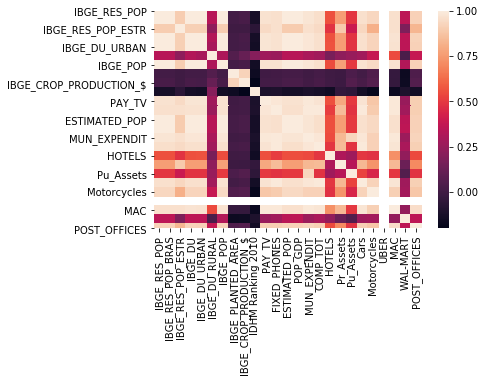

In [14]:
correlation= df2.corr()
sns.heatmap(correlation)

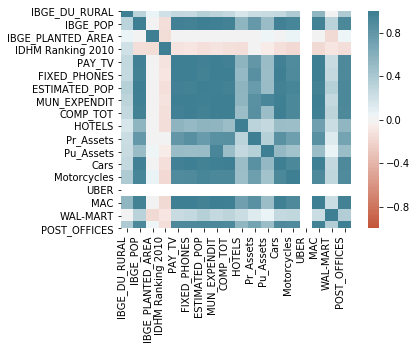

In [28]:
corr = df2.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
);